## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def freq_testa(n):
    serie = pd.Series(np.random.randint(0, 2, size = n))
    return serie.value_counts(normalize= True).get(0)

In [36]:
ris = {"N": [], "freq": []}
for N in np.arange(10, 20000, 100):
    ris["N"].append(N)
    ris["freq"].append(freq_testa(N))


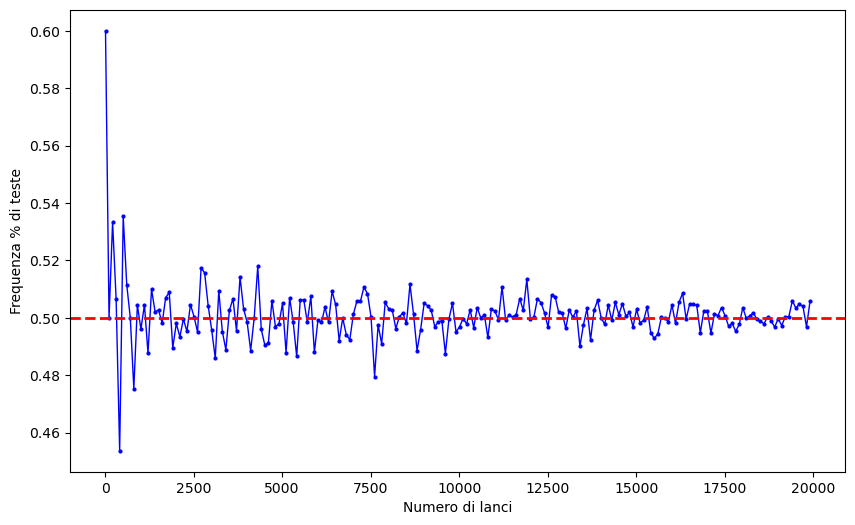

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(ris["N"], ris["freq"], 'o-', markersize = 2, color = 'blue', linewidth = 1, label = "Legge dei grandi numeri"  )
plt.axhline(0.5, color='red', linestyle='--', linewidth = 2)
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza % di teste")
plt.show()



## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mostrando insieme i dati di uomini e donne

In [38]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 12)

In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
mod_Embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mod_Embarked, inplace=True)

In [45]:
df = df.dropna(subset=['Age'])

In [48]:
df.drop_duplicates()
df.shape

(714, 12)

In [ ]:
df.groupby('Pclass')['Age'].mean()

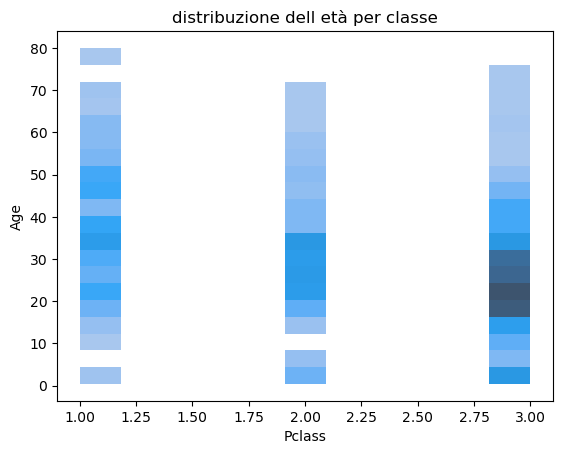

In [49]:
sns.histplot(data=df, x='Pclass',y='Age', kde=True)
plt.title('distribuzione dell età per classe')
plt.show()

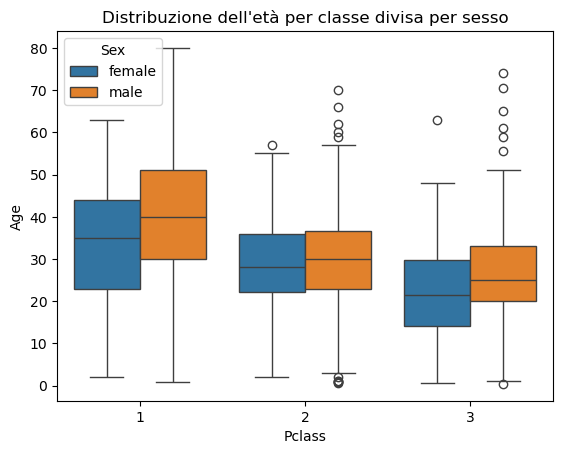

In [54]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")
plt.title("Distribuzione dell'età per classe divisa per sesso")
plt.show()



## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [59]:
df.groupby('species')[['petal_length', 'petal_width']].mean()

,petal_length,petal_width
species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


<Axes: xlabel='petal_length', ylabel='petal_width'>

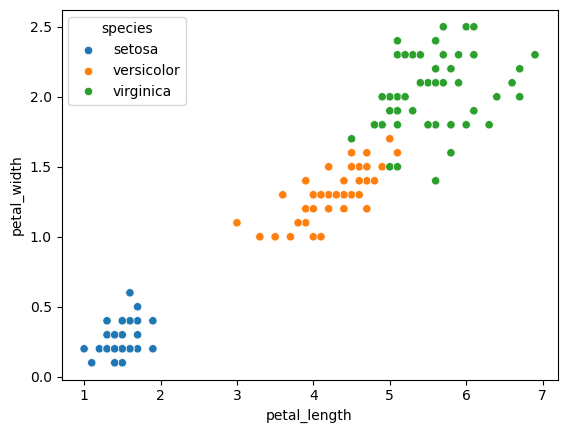

In [60]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [63]:
df['petal_area'] = df['petal_length'] * df['petal_width']
df['petal_area'].describe()


count    150.000000
mean       5.794067
std        4.712390
min        0.110000
25%        0.420000
50%        5.615000
75%        9.690000
max       15.870000
Name: petal_area, dtype: float64

<Axes: xlabel='species', ylabel='petal_area'>

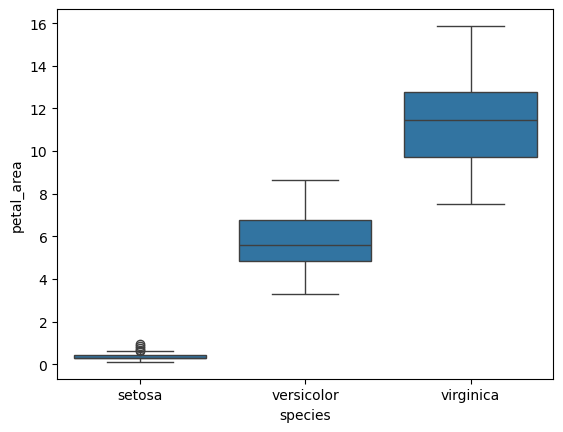

In [64]:
sns.boxplot(data=df, x = 'species', y = 'petal_area')